## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [216]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.utils import io

import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [217]:
df = pd.read_csv('new_QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [218]:
df.head()
df.tail()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


,DATE,TAG,POSTS
2435,2023-03-01 00:00:00,php,2777
2436,2023-03-01 00:00:00,python,17379
2437,2023-03-01 00:00:00,r,3966
2438,2023-03-01 00:00:00,ruby,316
2439,2023-03-01 00:00:00,swift,1516


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [219]:
df.shape

(2440, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [220]:
df.count()

DATE     2440
TAG      2440
POSTS    2440
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [221]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

C:\Users\tpoll\AppData\Local\Temp\ipykernel_11024\3500195334.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum().sort_values('POSTS', ascending=False)


,POSTS
TAG,
javascript,2484600
python,2120335
java,1891791
c#,1586318
php,1456549
c++,791104
r,485745
c,394607
swift,325864


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [222]:
df['TAG'].value_counts()

c#            177
assembly      176
c             176
c++           176
delphi        176
java          176
javascript    176
perl          176
php           176
python        176
ruby          176
r             174
swift         168
go            161
Name: TAG, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [223]:
# both notations do the same thing (dot notation only works when the column name has no spaces)
df['DATE'][1]
type(df.DATE[1])

'2008-08-01 00:00:00'

str

In [224]:
pd.to_datetime(df.DATE[1])
type(pd.to_datetime(df.DATE[1]))

Timestamp('2008-08-01 00:00:00')

pandas._libs.tslibs.timestamps.Timestamp

In [225]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [226]:
# pivot df
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [227]:
reshaped_df.shape

(177, 14)

In [228]:
reshaped_df.head()
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-11-01,289.0,2183.0,6030.0,3300.0,116.0,750.0,6794.0,14345.0,110.0,3360.0,22877.0,4630.0,466.0,1671.0
2022-12-01,284.0,1862.0,5341.0,2865.0,86.0,632.0,5980.0,12545.0,95.0,2889.0,19331.0,3687.0,395.0,1468.0
2023-01-01,239.0,1515.0,5394.0,2667.0,114.0,737.0,5789.0,12275.0,75.0,3086.0,18083.0,3758.0,374.0,1445.0
2023-02-01,191.0,1318.0,4790.0,2240.0,133.0,665.0,5224.0,10501.0,79.0,2454.0,15816.0,3819.0,340.0,1312.0
2023-03-01,197.0,1358.0,5278.0,2802.0,153.0,704.0,6134.0,11450.0,98.0,2777.0,17379.0,3966.0,316.0,1516.0


In [229]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [230]:
reshaped_df.count().sort_values(ascending=False)

TAG
c#            177
assembly      176
c             176
c++           176
delphi        176
java          176
javascript    176
perl          176
php           176
python        176
ruby          176
r             174
swift         168
go            161
dtype: int64

In [231]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,289.0,2183.0,6030.0,3300.0,116.0,750.0,6794.0,14345.0,110.0,3360.0,22877.0,4630.0,466.0,1671.0
2022-12-01,284.0,1862.0,5341.0,2865.0,86.0,632.0,5980.0,12545.0,95.0,2889.0,19331.0,3687.0,395.0,1468.0
2023-01-01,239.0,1515.0,5394.0,2667.0,114.0,737.0,5789.0,12275.0,75.0,3086.0,18083.0,3758.0,374.0,1445.0


In [232]:
reshaped_df.isna().values.any()

False

In [233]:
reshaped_df.count().sort_values(ascending=False)

TAG
assembly      177
c             177
c#            177
c++           177
delphi        177
go            177
java          177
javascript    177
perl          177
php           177
python        177
r             177
ruby          177
swift         177
dtype: int64

**The number of entries is now different because replacing NaN with 0 counts as one entry and therefore every programming language has as many entries as the programming language with originally the most ones (C# in this example)**

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

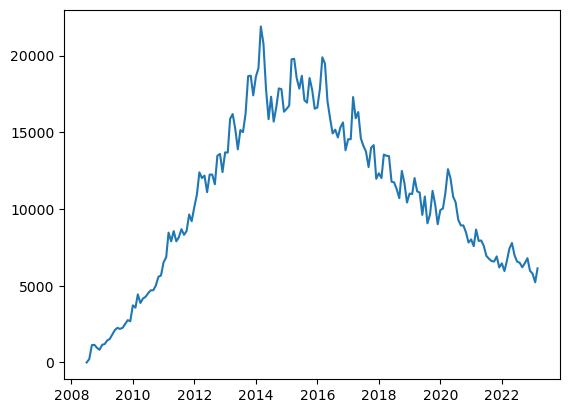

In [234]:
# reshaped_df['java'].plot(x='DATE', y='POSTS') --> does the same thing
# plt.figure(figsize=(16, 10))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Number of Posts', fontsize=16)
# plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

<Axes: title={'center': 'Number of Posts in Java'}, xlabel='Date', ylabel='Number of Posts'>

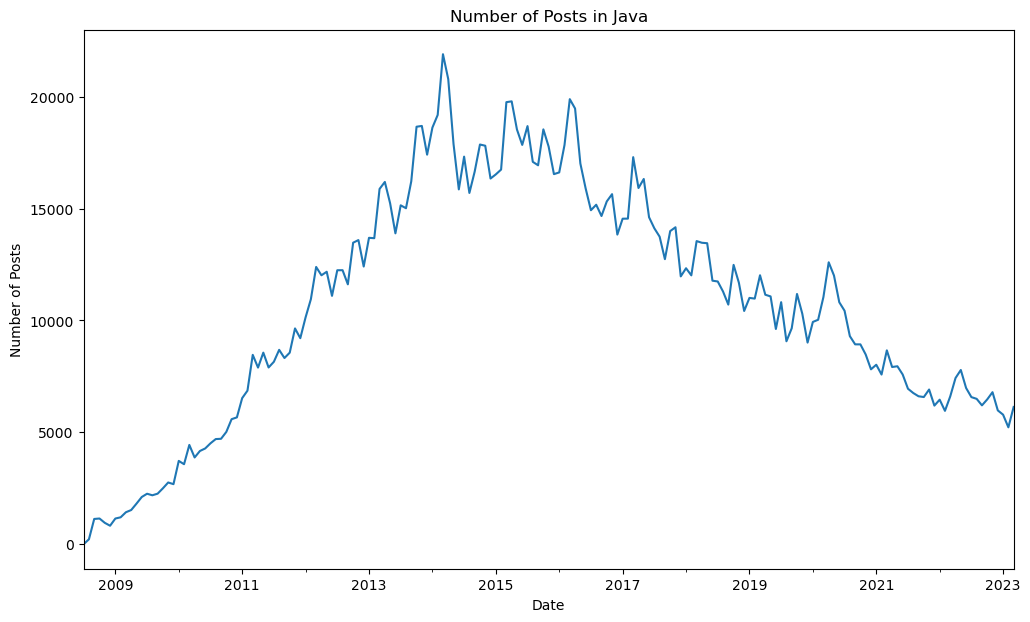

In [235]:
reshaped_df['java'].plot(x='DATE', y='POSTS', figsize=(12, 7), xlabel='Date', ylabel='Number of Posts', title='Number of Posts in Java')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

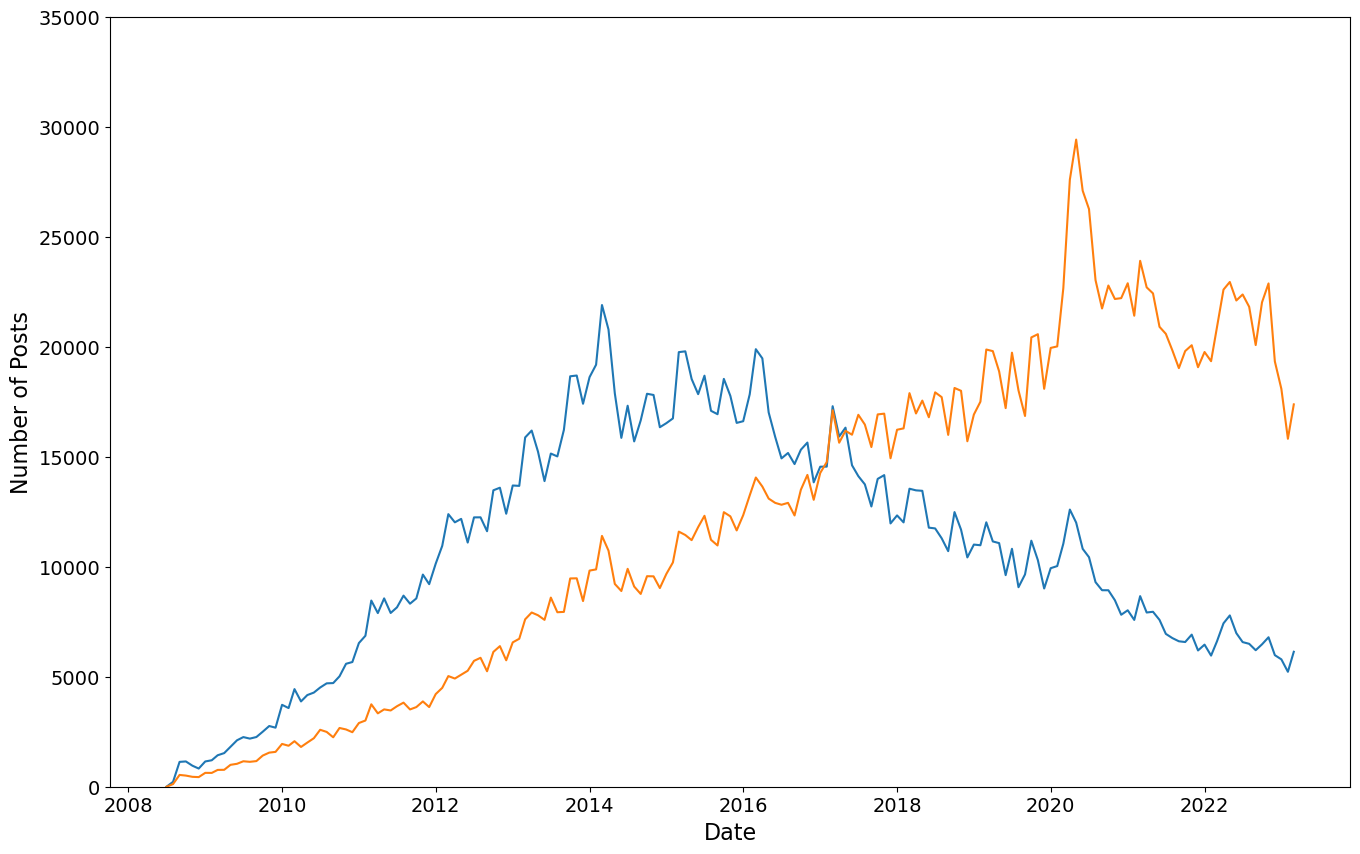

In [236]:
# Surpresses the text output
with io.capture_output() as captured:
    plt.figure(figsize=(16, 10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Number of Posts', fontsize=16)
    plt.ylim(0, 35000)
    
    plt.plot(reshaped_df.index, reshaped_df['java'])
    plt.plot(reshaped_df.index, reshaped_df['python'])

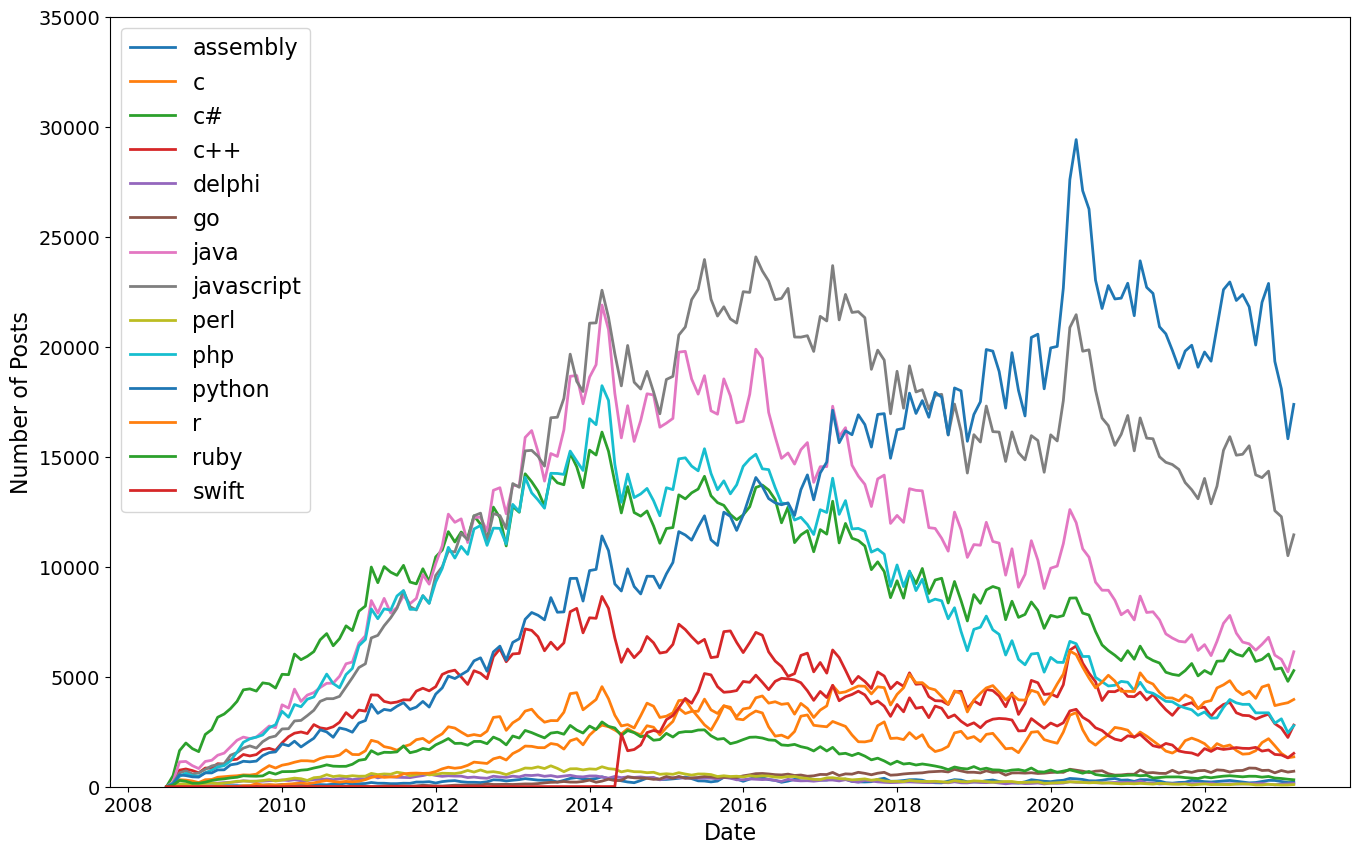

In [237]:
with io.capture_output() as captured:
    plt.figure(figsize=(16, 10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Number of Posts', fontsize=16)
    plt.ylim(0, 35000)
    for column in reshaped_df.columns:
        plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)

    plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [238]:
rolled_df = reshaped_df.rolling(window=3).mean()

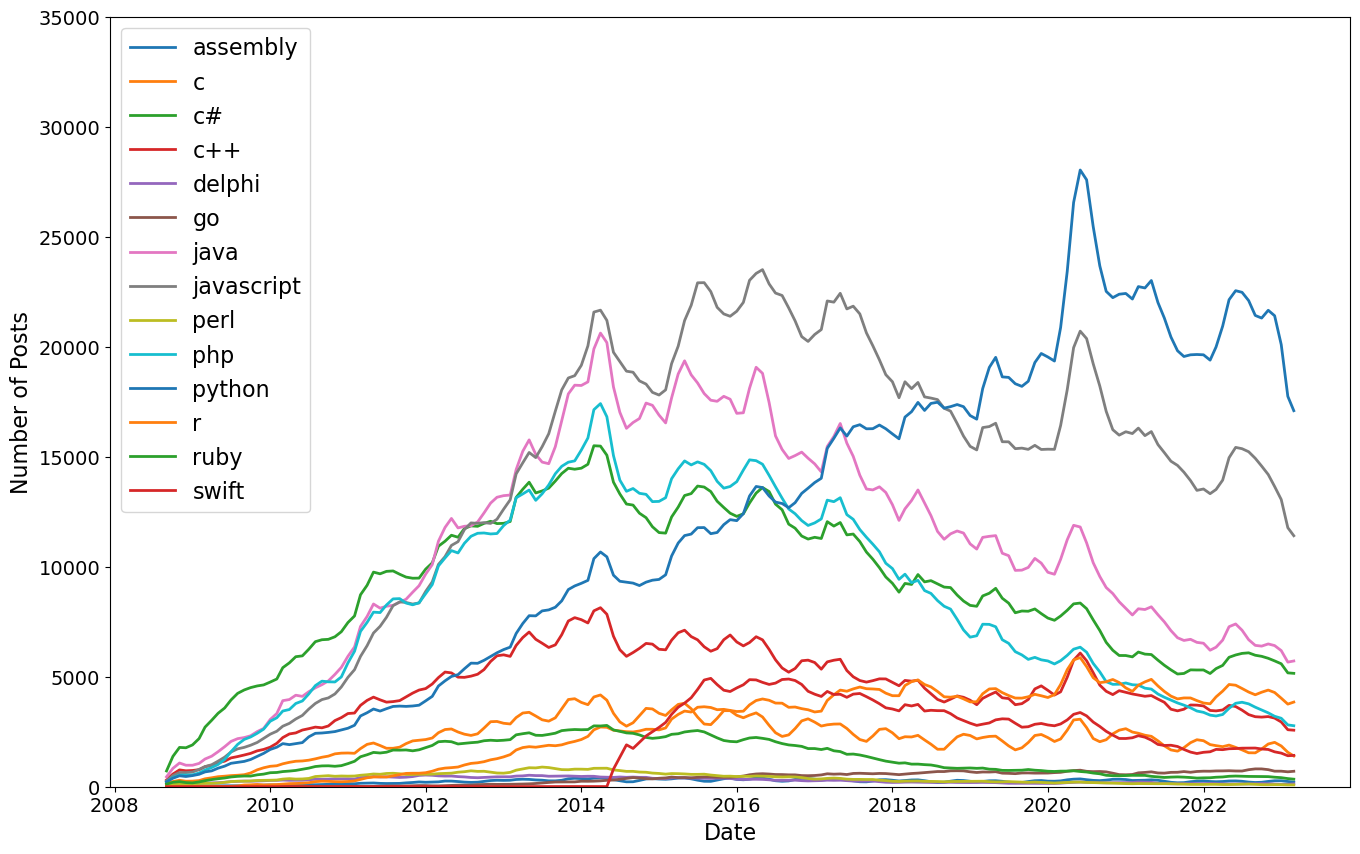

In [239]:
with io.capture_output() as captured:
    plt.figure(figsize=(16, 10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Number of Posts', fontsize=16)
    plt.ylim(0, 35000)

    for column in rolled_df.columns:
        plt.plot(rolled_df.index, rolled_df[column], linewidth=2, label=rolled_df[column].name)

    plt.legend(fontsize=16)

### **Python Wins!**